In [1]:
import keras
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

## load data

In [4]:
img = load_img('food/Dosa/img1.jpeg')

In [5]:
x = img_to_array(img)

In [6]:
x.shape

(194, 259, 3)

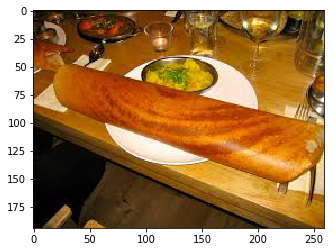

In [7]:
plt.imshow(x/255.)

In [52]:
img_generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(128,128), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [53]:
train_generator = get_batches('data/food/', 'training')
val_generator = get_batches('data/food/', 'validation')

Found 260 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


## Build CNN model

In [78]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(128, 128, 3)))
model.add(Flatten())
model.add(Dense(units=4, activation='softmax'))

In [79]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [80]:
batch_size = 28

In [82]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=800 // batch_size)

Epoch 1/10
71/71 [==============================] - 6s 85ms/step - loss: 0.9742 - acc: 0.6145 - val_loss: 1.1341 - val_acc: 0.5468
Epoch 2/10
71/71 [==============================] - 5s 73ms/step - loss: 0.7123 - acc: 0.7377 - val_loss: 1.1106 - val_acc: 0.5172
Epoch 3/10
71/71 [==============================] - 6s 79ms/step - loss: 0.5057 - acc: 0.8362 - val_loss: 1.2104 - val_acc: 0.5222
Epoch 4/10
71/71 [==============================] - 5s 74ms/step - loss: 0.3722 - acc: 0.8908 - val_loss: 1.5108 - val_acc: 0.5222
Epoch 5/10
71/71 [==============================] - 5s 72ms/step - loss: 0.3067 - acc: 0.9067 - val_loss: 1.2964 - val_acc: 0.5172
Epoch 6/10
71/71 [==============================] - 5s 75ms/step - loss: 0.1352 - acc: 0.9877 - val_loss: 1.6037 - val_acc: 0.4975
Epoch 7/10
71/71 [==============================] - 6s 80ms/step - loss: 0.0684 - acc: 0.9965 - val_loss: 1.6674 - val_acc: 0.5172
Epoch 8/10
71/71 [==============================] - 5s 73ms/step - loss: 0.0397 - a

## CNN model

In [93]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [94]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [99]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [102]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/20
71/71 [==============================] - 8s 115ms/step - loss: 0.0856 - acc: 0.9806 - val_loss: 3.6897 - val_acc: 0.5369

Epoch 00001: val_loss improved from inf to 3.68967, saving model to model-001.h5
Epoch 2/20
71/71 [==============================] - 8s 111ms/step - loss: 0.0118 - acc: 0.9947 - val_loss: 4.6984 - val_acc: 0.5862

Epoch 00002: val_loss did not improve
Epoch 3/20
71/71 [==============================] - 8s 114ms/step - loss: 0.0279 - acc: 0.9894 - val_loss: 5.4163 - val_acc: 0.5320

Epoch 00003: val_loss did not improve
Epoch 4/20
71/71 [==============================] - 8s 111ms/step - loss: 0.0701 - acc: 0.9789 - val_loss: 4.4573 - val_acc: 0.5567

Epoch 00004: val_loss did not improve
Epoch 5/20
71/71 [==============================] - 8s 111ms/step - loss: 0.0557 - acc: 0.9806 - val_loss: 5.0162 - val_acc: 0.5468

Epoch 00005: val_loss did not improve
Epoch 6/20
71/71 [==============================] - 8s 112ms/step - loss: 0.0144 - acc: 0.9930 - val_l

## Image augmentation

In [103]:
img_generator = ImageDataGenerator(rotation_range=90.,
                                   featurewise_center=True, 
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   vertical_flip=True,
                                   zoom_range=0.4,
                                   featurewise_std_normalization=True,
                                   width_shift_range=20,
                                   height_shift_range=20,
                                   validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(128,128), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [104]:
train_generator = get_batches('data/food/', 'training')
val_generator = get_batches('data/food/', 'validation')

Found 260 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [105]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [106]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [107]:
checkpoint = ModelCheckpoint('model-imgaug-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [108]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


71/71 [==============================] - 11s 152ms/step - loss: 1.3523 - acc: 0.3293 - val_loss: 1.3541 - val_acc: 0.3498

Epoch 00001: val_loss improved from inf to 1.35412, saving model to model-imgaug-001.h5
Epoch 2/20
71/71 [==============================] - 10s 140ms/step - loss: 1.2804 - acc: 0.4137 - val_loss: 1.2403 - val_acc: 0.3645

Epoch 00002: val_loss improved from 1.35412 to 1.24028, saving model to model-imgaug-002.h5
Epoch 3/20
71/71 [==============================] - 11s 148ms/step - loss: 1.2253 - acc: 0.3961 - val_loss: 1.1608 - val_acc: 0.4384

Epoch 00003: val_loss improved from 1.24028 to 1.16081, saving model to model-imgaug-003.h5
Epoch 4/20
71/71 [==============================] - 10s 142ms/step - loss: 1.2297 - acc: 0.4279 - val_loss: 1.2689 - val_acc: 0.4187

Epoch 00004: val_loss did not improve
Epoch 5/20
71/71 [==============================] - 10s 146ms/step - loss: 1.1905 - acc: 0.4437 - val_loss: 1.0535 - val_acc: 0.4828

Epoch 00005: val_loss improved 

## CNN Model 2

In [110]:
train_generator = get_batches('data/food/', 'training')
val_generator = get_batches('data/food/', 'validation')

Found 260 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [111]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [112]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [113]:
checkpoint = ModelCheckpoint('model-imgaugII-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [115]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/20
 1/71 [..............................] - ETA: 14s - loss: 1.2778 - acc: 0.2500

/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


71/71 [==============================] - 11s 154ms/step - loss: 1.1407 - acc: 0.4895 - val_loss: 1.1710 - val_acc: 0.5074

Epoch 00001: val_loss did not improve
Epoch 2/20
71/71 [==============================] - 10s 145ms/step - loss: 1.1134 - acc: 0.5124 - val_loss: 1.4055 - val_acc: 0.2956

Epoch 00002: val_loss did not improve
Epoch 3/20
71/71 [==============================] - 10s 146ms/step - loss: 1.1409 - acc: 0.5053 - val_loss: 1.2199 - val_acc: 0.4433

Epoch 00003: val_loss did not improve
Epoch 4/20
71/71 [==============================] - 10s 146ms/step - loss: 1.0961 - acc: 0.5106 - val_loss: 1.1162 - val_acc: 0.5369

Epoch 00004: val_loss did not improve
Epoch 5/20
71/71 [==============================] - 11s 149ms/step - loss: 1.0694 - acc: 0.5247 - val_loss: 1.1144 - val_acc: 0.5025

Epoch 00005: val_loss did not improve
Epoch 6/20
71/71 [==============================] - 10s 147ms/step - loss: 1.0912 - acc: 0.5193 - val_loss: 1.2671 - val_acc: 0.3645

Epoch 00006: val_

## Transfer Learning

In [8]:
from keras.applications import ResNet50

In [9]:
img_generator = ImageDataGenerator(rotation_range=90.,
                                   featurewise_center=True, 
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   vertical_flip=True,
                                   zoom_range=0.4,
                                   featurewise_std_normalization=True,
                                   width_shift_range=20,
                                   height_shift_range=20,
                                   validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(224,224), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [10]:
train_generator = get_batches('food/', 'training')
val_generator = get_batches('food/', 'validation')

Found 260 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [11]:
base_model = ResNet50(include_top=False, input_shape=(224,224,3))

94658560/94653016 [==============================] - 1s 0us/step


In [16]:
batch_size=8

In [12]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- we have 10 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

In [13]:
checkpoint = ModelCheckpoint('model-trflrn-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [14]:
m.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
m.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


250/250 [==============================] - 175s 702ms/step - loss: 1.5156 - acc: 0.3185 - val_loss: 9.7974 - val_acc: 0.3209

Epoch 00001: val_loss improved from inf to 9.79735, saving model to model-trflrn-001.h5
Epoch 2/20
250/250 [==============================] - 111s 446ms/step - loss: 1.3696 - acc: 0.3460 - val_loss: 2.4048 - val_acc: 0.4329

Epoch 00002: val_loss improved from 9.79735 to 2.40482, saving model to model-trflrn-002.h5
Epoch 3/20
250/250 [==============================] - 110s 440ms/step - loss: 1.2959 - acc: 0.4115 - val_loss: 2.2675 - val_acc: 0.3278

Epoch 00003: val_loss improved from 2.40482 to 2.26753, saving model to model-trflrn-003.h5
Epoch 4/20
250/250 [==============================] - 111s 444ms/step - loss: 1.1802 - acc: 0.4830 - val_loss: 3.2671 - val_acc: 0.3472

Epoch 00004: val_loss did not improve
Epoch 5/20
250/250 [==============================] - 110s 441ms/step - loss: 1.1515 - acc: 0.4930 - val_loss: 2.0850 - val_acc: 0.3776

Epoch 00005: val